# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and inspecting the dataset

In [2]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
print("Dataset shape:", df.shape)
print("\n")
df.info()

Dataset shape: (303, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    0.600660    0.663366   
std      0.994971   22.8750

In [7]:
print(df['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


# Preprocessing

In [8]:
X = df.drop('target', axis=1)
y = df['target']

print("Features matrix shape: ", X.shape)
print("Target vector shape: ", y.shape)

Features matrix shape:  (303, 13)
Target vector shape:  (303,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Building a pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

In [11]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(class_weight='balanced', random_state=42))])

In [12]:
# Predict on the test set
y_pred = svm_pipeline.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8689

Confusion Matrix:
 [[27  6]
 [ 2 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf']
}

In [15]:
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

In [16]:
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", round(grid_search.best_score_, 4))

Best parameters: {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best F1 Score: 0.8156


In [17]:
best_svm = grid_search.best_estimator_

y_pred_best = best_svm.predict(X_test)

print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("\nClassification report:", classification_report(y_test, y_pred_best))


Test Accuracy: 0.8525

Classification report:               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# Visualization

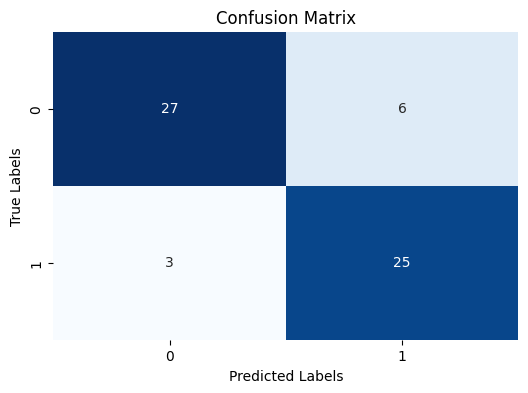

In [24]:
# Generate predictions
y_pred = best_svm.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


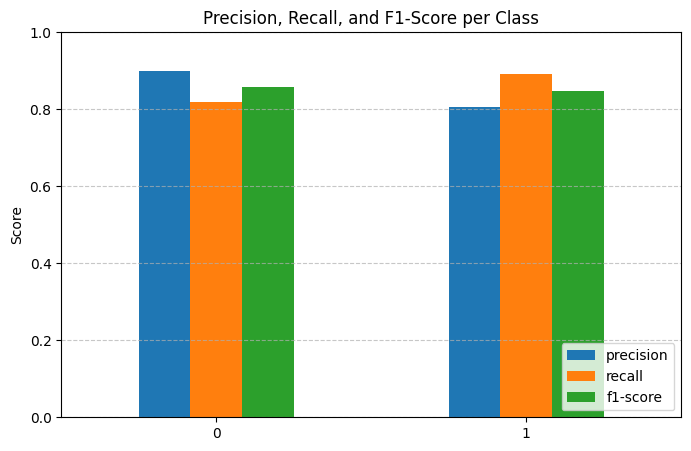

In [25]:
# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Drop averages if you only want class-wise metrics
df_metrics = df_report.iloc[:2, :3]  # only classes 0 and 1

# Plot bar chart
df_metrics.plot(kind='bar', figsize=(8,5))
plt.title("Precision, Recall, and F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Making a single prediction

In [22]:
# Example input (replace values with real features in correct order)
input_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

# Convert input_data to DataFrame with correct column names
input_df = pd.DataFrame(input_data, columns=X_train.columns)

# Predict
prediction = best_svm.predict(input_df)[0]

print("Prediction:", "Heart Disease" if prediction == 1 else "No Heart Disease")

Prediction: No Heart Disease
